# CHSH Inequaliy Homework

## PLEASE READ ALL SECTIONS

## Overview
In this tutorial, you will run an experiment on a quantum computer to demonstrate the violation of the CHSH inequality.

The CHSH (or Bell) Inequality, named after the authors Clauser, Horne, Shimony, and Holt, is used to experimentally prove Bell's theorem (1969). This theorem asserts that local hidden variable theories cannot account for some consequences of entanglement in quantum mechanics. The violation of the CHSH inequality is used to show that quantum mechanics is incompatible with local hidden-variable theories. This is an important experiment for understanding the foundation of quantum mechanics.

The 2022 Nobel Prize for Physics was awarded to Alain Aspect, John Clauser and Anton Zeilinger in part for their pioneering work in quantum information science, and in particular, for their experiments with entangled photons demonstrating violation of Bell’s inequalities.

![Image][3]

You can learn more about it in this [video][4]

## Objectives
* Create an open (free) account for [IBM Quantum Learning][1]
* Learn how to use the [Qiskit API][2] to build and run simple circuits
* Use circuit job results to justify the violation of the CHSH inequality

## Grading
You are expected to write your own code. It is acceptable to find and use code from the [Qiskit API][2] and [IBM Quantum Learning][1] webpages, but **it is strictly prohibited to use code obtained from other sources**, especially other students. You are also expected to write descriptive comments explaining what your code is trying to accomplish and why.

These are the following gradable items and their weights
1. Building Circuits (40%)
    1. Entangling Qubits (12%)
        - Build Bell Circuit (10%)
        - Draw Bell Circuit (2%)
    2. Adding View Measurements (28%)
        - Building Experiments (20%)
        - Plotting View Circuits (8%)
2. Running Circuits (40%)
    1. Create Plotting Function (5%)
    2. Run Circuit on Ideal Simulator (10%)
    3. Run Circuit on Noisy Simulator (10%)
        - Get a Backend (1%)
        - Creating a Noise Model (2%)
        - Transpile Circuits to Backend (2%)
        - Run and Plot Results (5%)
    4. Run Circuit on IBM Quantum Computer (15%)
        - Parallelize Experiments (7%)
        - Transpile Circuit (2%)
        - Run Circuit (2%)
        - Plot Results (4%)
        
3. Calculations (20%)
    1. Calculating Expectation Values (8%)
        - Function to Calculate Expectation Value (1%)
        - Calculate Expectation Value for Ideal Simulator (2%)
        - Calculate Expectation Value for Noisy Simulator (2%)
        - Calculate Expectation Value for IBM Quantum Computer (3%)
    2. Calculating CHSH Values (12%)
        - Function to Calculate CHSH Value (2%)
        - Calculate CHSH Value for Ideal Simulator (3%)
        - Calculate CHSH Value for Noisy Simulator (3%)
        - Calculate CHSH Value for IBM Quantum Computer (4%)
        

[1]: https://learning.quantum.ibm.com/
[2]: https://docs.quantum.ibm.com/api/qiskit
[3]: https://i.ytimg.com/vi/9OM0jSTeeBg/maxresdefault.jpg
[4]: https://www.youtube.com/watch?v=9OM0jSTeeBg

### Environment Verification
Before you proceed, please verify your kernel is running the **Python 3.11** environment you created with `pip install -r requirements.txt`<br><br>
If you don't see your environment in the kernel list, you need to add it using the terminal and relaunch jupyter. You can add your environment to interactive python using this command<br><br> `ipython kernel install --user --name=ENV_NAME` (replacing `ENV_NAME`)<br><br>
After you've selected the correct environment, run this next cell, but do NOT edit it in any way! If no errors pop up, then your environment should be able to run this notebook with ease.

In [1]:
# DO NOT EDIT THIS CELL
n = 20

import sys
print("python", sys.version)

import numpy
print("numpy".ljust(n), numpy.__version__)

import matplotlib
print("matplotlib".ljust(n), matplotlib.__version__)

import qiskit
print("qiskit".ljust(n), qiskit.__version__)

import qiskit_aer
print("qiskit_aer".ljust(n), qiskit_aer.__version__)

import qiskit_ibm_runtime
print("qiskit_ibm_runtime".ljust(n), qiskit_ibm_runtime.__version__)

python 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]
numpy                2.1.1
matplotlib           3.9.2
qiskit               1.2.4
qiskit_aer           0.15.1
qiskit_ibm_runtime   0.32.0


### Library Imports
We will need these libraries, classes, and utilities to write and run code for this homework. There should be no import errors if everything is installed correctly.

In [3]:
# General
import numpy as np

# Plotting routines
import matplotlib.pyplot as plt

# Qiskit imports
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Qiskit Aer imports
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel

# Qiskit Runtime imports
from qiskit_ibm_runtime import QiskitRuntimeService, Session, SamplerV2 as Sampler, SamplerOptions

# **Section 1: Building Circuits (40%)**
This section is dedicated to building quantum circuits using Qiskit

## Part 1: Creating Entangled Qubits (12%)
These experiments will require applying rotations and measurements on entangled qubits, so let's start by writing a Python function that will create and return a 2-qubit 2-cbit circuit that applies a Hadarmard gate on the first qubit and a CNOT targetting the second qubit controlled by the first qubit. An optional barrier can be added to make visualization cleaner.

### Building a Bell Circuit (10%)
Fill in the Python function `BellCircuit` with Qiskit code that will return a quantum circuit created from `qreg` and `creg` that applies a Hadarmard gate on the first qubit and a CNOT targetting the second qubit controlled by the first qubit. An optional barrier can be added to make visualization cleaner. Do NOT perform any measurements at this stage!

In [5]:
# Python function that creates a maximally entangled bell state
def BellCircuit(qreg_name='q', creg_name='c') -> QuantumCircuit:
    qreg_q = QuantumRegister(2, qreg_name)
    creg_c = ClassicalRegister(2, creg_name)

    # Initialize a QuantumCircuit with the created registers
    circuit = QuantumCircuit(qreg_q, creg_c)

    # Apply a Hadamard gate to the first qubit (qubit 0)
    # This puts the qubit into a superposition of |0> and |1>
    circuit.h(qreg_q[0])

    # Apply a CNOT gate with qubit 0 as control and qubit 1 as target
    # This entangles qubit 0 and qubit 1, creating a Bell state
    circuit.cx(qreg_q[0], qreg_q[1])

    # Optional: Add a barrier to separate circuit sections for better visualization
    circuit.barrier()

    # Return the quantum circuit
    return circuit


bell = BellCircuit()

### Drawing the Circuit (2%)
Use Qiskit API to `draw` the bell circuit using the matplotlib style

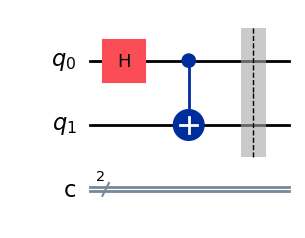

In [7]:
bell.draw('mpl')  # Draw the circuit in a matplotlib style

## Part 2 Adding View Measurements (28%)
Now that we have a maximally entangled bell state, let us measure it in 4 different views *AB*, *Ab*, *aB*, and *ab*. 
* *AB*: Rotate qubit 1 by around the Y-axis by $-\frac{\pi}{4}$ measuring both qubits in the Z basis
* *Ab*: Rotate qubit 1 by around the Y-axis by $\frac{\pi}{4}$ measuring both qubits in the Z basis
* *aB*: Rotate qubit 1 by around the Y-axis by $-\frac{\pi}{4}$ measuring qubit 0 in the X basis and qubit 1 in the Z basis
* *ab*: Rotate qubit 1 by around the Y-axis by $\frac{\pi}{4}$ measuring qubit 0 in the X basis and qubit 1 in the Z basis

### Building Experiments (20%)
Fill in the Python function `MeasureWithView` with Qiskit code that will create these different view circuits leveraging the previous `BellCircuit` function, then plot them using the given code below.

In [9]:
# Write code that will create circuits for AB, Ab, aB, and ab views
views = ("AB","Ab","aB","ab")


def MeasureWithView(circuit: QuantumCircuit, view: str):
     # Based on the provided view, apply rotations and measurements to the qubits
    if view == "AB":
        # Rotate qubit 0 around the Y-axis by -π/4
        circuit.ry(-np.pi / 4, circuit.qubits[0])
        # Measure both qubits in the Z basis (default measurement)
        circuit.measure(circuit.qubits[0], circuit.clbits[0])
        circuit.measure(circuit.qubits[1], circuit.clbits[1])

    elif view == "Ab":
        # Rotate qubit 0 around the Y-axis by π/4
        circuit.ry(np.pi / 4, circuit.qubits[0])
        # Measure both qubits in the Z basis
        circuit.measure(circuit.qubits[0], circuit.clbits[0])
        circuit.measure(circuit.qubits[1], circuit.clbits[1])

    elif view == "aB":
        # Rotate qubit 0 around the Y-axis by -π/4
        circuit.ry(-np.pi / 4, circuit.qubits[0])
        # Measure qubit 0 in the X basis (requires a Hadamard before measurement)
        circuit.h(circuit.qubits[0])  # Hadamard for X measurement
        circuit.measure(circuit.qubits[0], circuit.clbits[0])
        # Measure qubit 1 in the Z basis
        circuit.measure(circuit.qubits[1], circuit.clbits[1])

    elif view == "ab":
        # Rotate qubit 0 around the Y-axis by π/4
        circuit.ry(np.pi / 4, circuit.qubits[0])
        # Measure both qubits in the X basis
        circuit.h(circuit.qubits[0])  # Hadamard for X measurement
        circuit.measure(circuit.qubits[0], circuit.clbits[0])
        circuit.h(circuit.qubits[1])  # Hadamard for X measurement
        circuit.measure(circuit.qubits[1], circuit.clbits[1])

    # Return the modified circuit

    
    return circuit


circuits = [MeasureWithView(BellCircuit('q'+view,'c'+view),view) for view in views]

### Plotting the Different View Circuits (8%)
Fill in the `PlotCircuits` Python function with code that will create a figure containing a drawing of each view circuit by calling its `draw` method. Check that your circuits make sense and appear as described in the instructions.

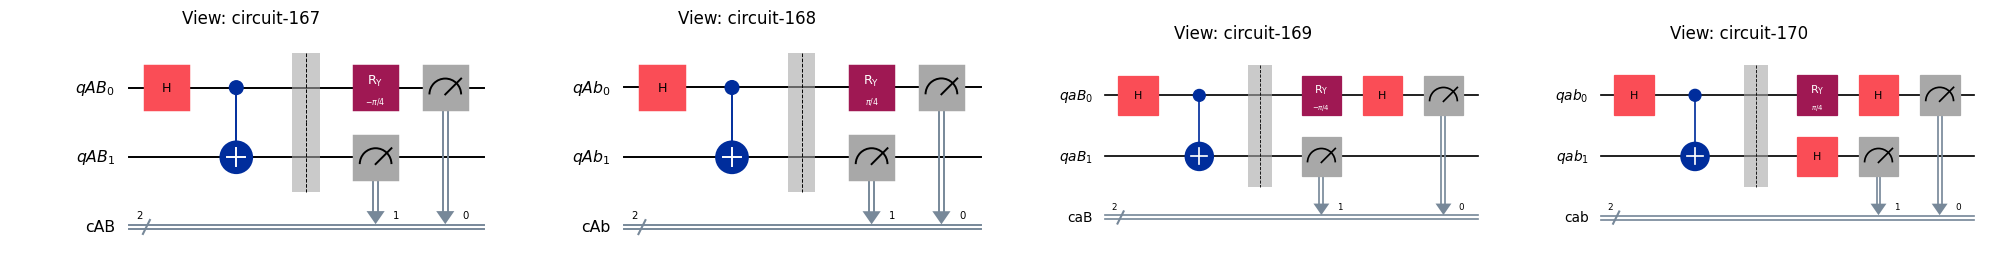

In [11]:
# Plot the circuits into 1 figure
def PlotCircuits(*circuits: QuantumCircuit):
 # Create a figure to hold the subplots
    fig, axs = plt.subplots(1, len(circuits), figsize=(20, 5))

    # Iterate through the circuits and plot each one
    for ax, circuit in zip(axs, circuits):
        circuit.draw('mpl', ax=ax)  # Draw the circuit on the respective subplot
        ax.set_title(f"View: {circuit.name}")  # Set the title for each subplot

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()  # Display the figure with all the circuits

# Call the function to plot the circuits

PlotCircuits(*circuits)

# **Section 2: Running Circuits (40%)**
This next section is dedicated to running your quantum circuits on both ideal and noisy simulators, and finally plotting the results.

## Part 1: Creating a Plotting Function (5%)
Fill the `PlotCircuitResults` Python function with code that will utilize `plot_histogram` to visualize the counts of each observable from a circuit job. There is an example dictionary you should test with.

In [61]:
%matplotlib inline


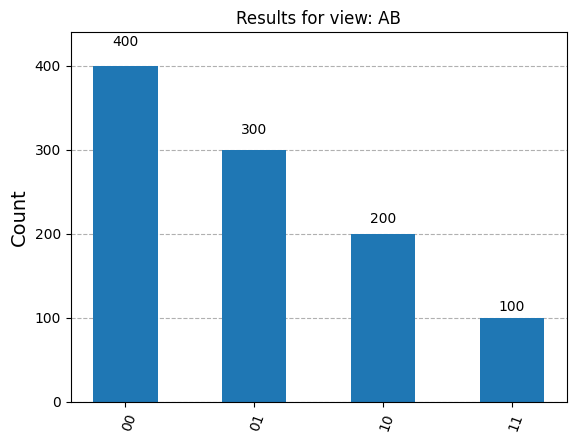

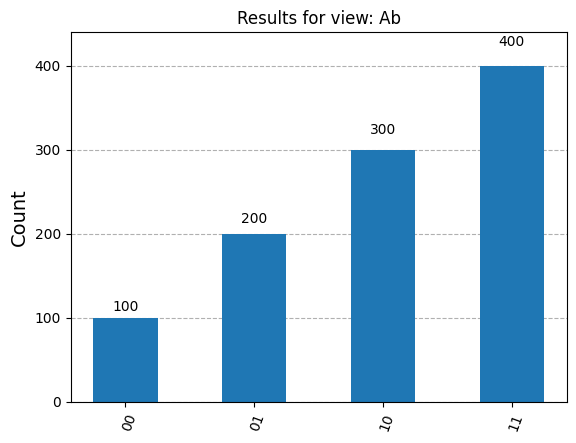

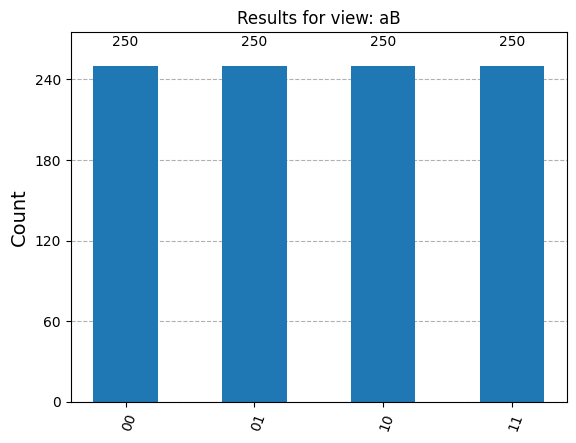

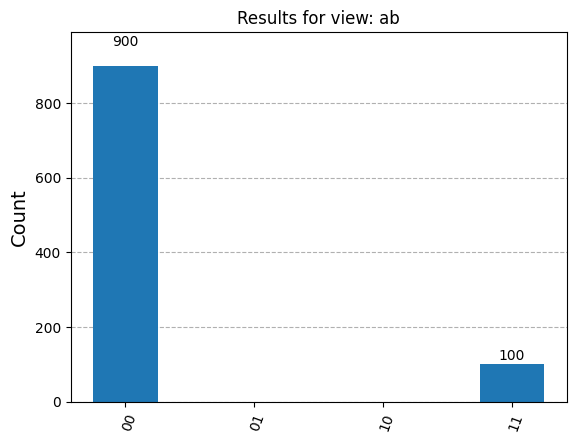

<Figure size 640x480 with 0 Axes>

In [63]:
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram
# Plot the circuits into 1 figure
def PlotCircuitResults(circuit_results: dict):
    # Iterate through the dictionary items for each view and its corresponding results
    for view, counts in circuit_results.items():
        # Use Qiskit's plot_histogram to visualize the counts for each observable
        plot_histogram(counts, title=f"Results for view: {view}")
    
PlotCircuitResults({
    "AB":{"00": 400, "01": 300, "10": 200, "11": 100},
    "Ab":{"00": 100, "01": 200, "10": 300, "11": 400},
    "aB":{"00": 250, "01": 250, "10": 250, "11": 250},
    "ab":{"00": 900, "01": 000, "10": 000, "11": 100},
})
plt.figure()  # Create a new figure for each plot
plt.show()  # Display the plot

## Part 2: Running Circuits on an **Ideal Simulator** (10%)
Use Qiskit's [AerSimulator][1] to simulate 1000 shots for each view circuit, then use the `PlotCircuitResults` function to plot the counts from each view circuit job result.

[1]: https://qiskit.github.io/qiskit-aer/stubs/qiskit_aer.AerSimulator.html

In [57]:
%matplotlib inline


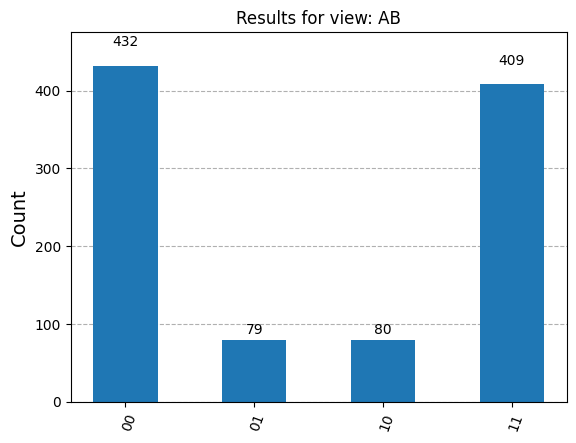

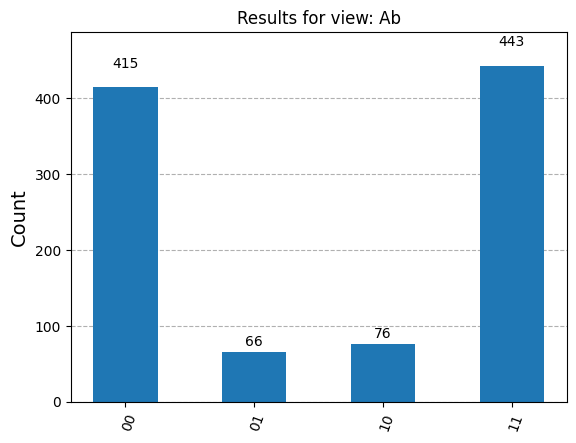

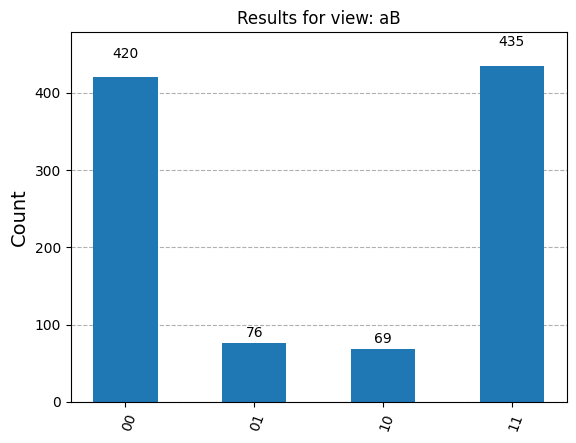

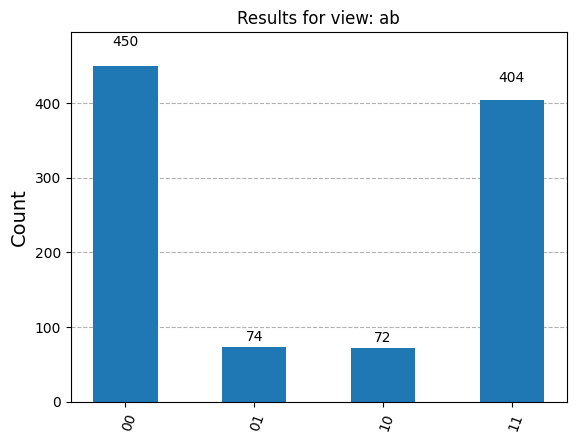

In [59]:
# Python function that creates a maximally entangled Bell state
def BellCircuit(qreg_name='q', creg_name='c') -> QuantumCircuit:
    qreg_q = QuantumRegister(2, qreg_name)  # Create a quantum register with 2 qubits
    creg_c = ClassicalRegister(2, creg_name)  # Create a classical register with 2 bits
    circuit = QuantumCircuit(qreg_q, creg_c)  # Initialize the quantum circuit with the registers
    
    # Apply Hadamard gate on the first qubit
    circuit.h(qreg_q[0])
    # Apply CNOT gate targeting the second qubit controlled by the first qubit
    circuit.cx(qreg_q[0], qreg_q[1])
    
    return circuit  # Return the constructed circuit

def MeasureWithView(circuit: QuantumCircuit, view: str) -> QuantumCircuit:
    """Modifies the circuit based on the measurement view."""
    if view == "AB":
        circuit.ry(-np.pi / 4, circuit.qregs[0][0])  # Rotate qubit 0 by -π/4 around Y-axis
        circuit.measure(circuit.qregs[0], circuit.cregs[0])  # Measure both qubits in the Z basis
    elif view == "Ab":
        circuit.ry(np.pi / 4, circuit.qregs[0][0])  # Rotate qubit 0 by π/4 around Y-axis
        circuit.measure(circuit.qregs[0], circuit.cregs[0])  # Measure both qubits in the Z basis
    elif view == "aB":
        circuit.ry(-np.pi / 4, circuit.qregs[0][0])  # Rotate qubit 0 by -π/4 around Y-axis
        circuit.measure(circuit.qregs[0][0], circuit.cregs[0][0])  # Measure qubit 0 in X basis
        circuit.measure(circuit.qregs[0][1], circuit.cregs[0][1])  # Measure qubit 1 in Z basis
    elif view == "ab":
        circuit.ry(np.pi / 4, circuit.qregs[0][0])  # Rotate qubit 0 by π/4 around Y-axis
        circuit.measure(circuit.qregs[0][0], circuit.cregs[0][0])  # Measure qubit 0 in X basis
        circuit.measure(circuit.qregs[0][1], circuit.cregs[0][1])  # Measure qubit 1 in Z basis

    return circuit  # Return the modified circuit

# Function to plot the results
def PlotCircuitResults(circuit_results: dict):
    """Plots the results of the quantum circuit measurements."""
    for view, counts in circuit_results.items():  # Iterate through the dictionary items
        plot_histogram(counts, title=f"Results for view: {view}")  # Use Qiskit's plot_histogram to visualize the counts

# Initialize the AerSimulator
simulator = AerSimulator()

# Define the measurement views
views = ['AB', 'Ab', 'aB', 'ab']

# Create a dictionary to hold results from each view circuit
results_ideal = {}

# Simulate each view circuit with 1000 shots
for view in views:
    # Create the Bell circuit and modify it for the specific view
    circuit = MeasureWithView(BellCircuit(), view)  # Pass in the Bell circuit
    job = simulator.run(circuit, shots=1000)  # Run the circuit with 1000 shots
    results_ideal[view] = job.result().get_counts()  # Get the result counts

# Plot the results using the PlotCircuitResults function
PlotCircuitResults(results_ideal)
plt.show()  # Explicitly show the plots

## Part 3: Running Circuits on an **IBM Noisy Simulator** (10%)
Use Qiskit's AerSimulator and NoiseModel to simulate 1000-shot runs of each view circuit as if they were ran on an 127-qubit IBM quantum computer, then use the `PlotCircuitResults` function to plot the quasi-dists from each view circuit job result.

### Loading Your QiskitRuntimeService Account
To request a backend from IBM, you need an IBM Quantum account synced to this notebook. For a service (like IBM) to track users jobs and utilization of their hardware resources, Qiskit uses an API token which is tied to your IBM Quantum account. It is critical to keep it secret because any device could use it and use QPU time under your account which would drain your credits / computing funds.

In [83]:
# Copy your token from the IBM Quantum Platform, run this cell, then delete the token.
QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token="4efcb497a3af674b414239021d767415e12113078aa3dc72de27d842f81f984d99211c8d6347776f24ec97fd99be6df9caa9ec7899971a59807396fc91a7f433",
    set_as_default=True,
    # Use `overwrite=True` if you're updating your token.
    overwrite=True,
)

Once you run the cell above, you only need to run the cell below to get the service because your API token is now safely stored on your device, but keep in mind if you run this notebook on another device, the saved account may be different.

In [86]:
# Load saved credentials
service = QiskitRuntimeService()

### Getting a Backend (1%)
Use the [QiskitRuntimeService][1] to request a real 127-qubit quantum computer backend from the `ibm_quantum` channel.
<br>**PLEASE DO NOT EXPLICITLY WRITE YOUR API TOKEN IN THIS NOTEBOOK, BUT RATHER SAVE YOUR ACCOUNT**

[1]: https://github.com/Qiskit/qiskit-ibm-runtime?tab=readme-ov-file#access-your-ibm-quantum-backends

In [98]:
available_backends = service.backends()
print("Available backends:")
for backend in available_backends:
    print(backend)

Available backends:
<IBMBackend('ibm_brisbane')>
<IBMBackend('ibm_kyiv')>
<IBMBackend('ibm_sherbrooke')>


In [109]:
# Request a real backend from the IBM Quantum service
backend_name = 'ibm_brisbane'  # Make sure this matches an available backend name
backend = service.get_backend(backend_name)  # Request the chosen backend
print(f"Using backend: {backend.name()}")


AttributeError: 'QiskitRuntimeService' object has no attribute 'get_backend'

Run the cell below to open a web browser to view the backend you requested

In [112]:
import webbrowser
webbrowser.open(f"https://quantum.ibm.com/services/resources?system={backend.name}")

True

### Creating a Noise Model (2%)
Create a `NoiseModel` using the backend you just requested, then create an `AerSimulator` using that noise model.

In [121]:
# Create a NoiseModel using the backend
noise_model = NoiseModel.from_backend(backend)


### Transpile Circuit for Noisy Backend (2%)
Use the `general_preset_pass_manager` to create a transpiler for your backend, then transpile your circuits.

In [128]:
# Use the general_preset_pass_manager to create a transpiler for the backend
pass_manager = generate_preset_pass_manager(2, backend)

# Transpile the circuits for the noisy backend
transpiled_circuits_noisy = [pass_manager.run(MeasureWithView(BellCircuit('q' + view, 'c' + view), view)) for view in views]


### Run Transpiled Circuits and Plot Results (5%)
Run the transpiled circuits using the noisy simulator, then call `PlotCircuitResults` plot the counts.

In [ ]:
%matplotlib inline


In [164]:
noisy_simulator = AerSimulator(noise_model=noise_model)


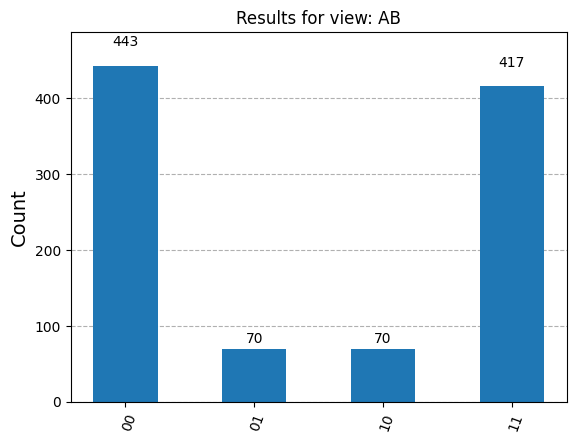

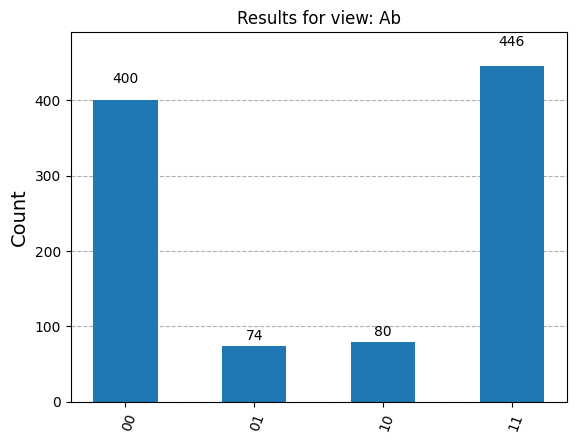

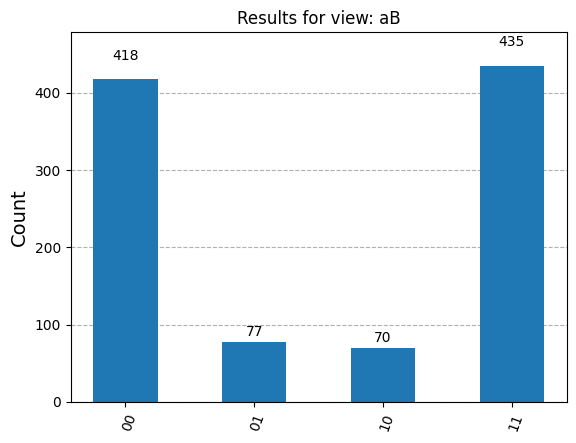

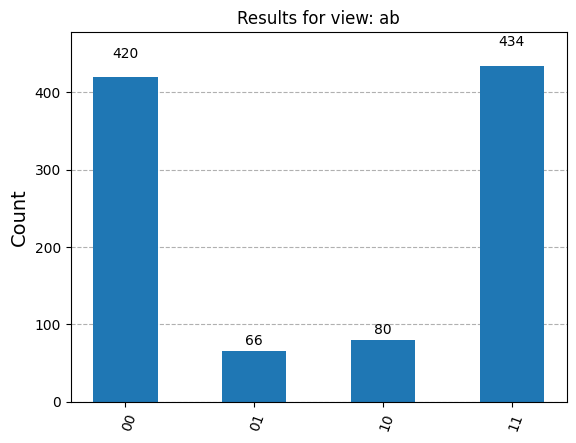

In [165]:
# Assuming `noisy_simulator` has been initialized correctly with the noise model
# and `transpiled_circuits_noisy` has been transpiled properly

# Run the transpiled circuits using the noisy simulator
results_transpiled_noisy = {}

for view, circuit in zip(views, transpiled_circuits_noisy):
    # Execute the circuit with 1000 shots
    job = noisy_simulator.run(circuit, shots=1000)

    # Wait for the job to complete (if necessary, depending on your simulation method)
    job.wait_for_final_state()  # This is optional and may vary depending on your setup

    # Get the result counts using the get_counts() method
    results_transpiled_noisy[view] = job.result().get_counts(circuit)

# Plot the results
PlotCircuitResults(results_transpiled_noisy)
plt.show()





## Part 4: Running Circuits on an IBM Quantum Computer (15%)
Running a circuit on IBM's quantum hardware is free but limited by Quantum Processing Unit (QPU) time per month. As such, caution should be taken before sending jobs to a real device. If the job is not set up correctly, it can easily result in a waste of QPU time.
<br><br>
When a job is sent for execution, it enters a job queue because a QPU can only service one job at a time and thousands of users are submitting jobs daily. QPU time is only accumulated when the job starts running after it has finished queueing.


### Optimizing Circuits for Real Backend
We have 4 experiments that utilize 2 qubits each, but our real backend uses quantum hardware that supports over 100 qubits. To be more efficient with that computing resource, we should parallelize some shots by using more qubits to save QPU time.

To achieve this, we will create a new 8-qubit circuit that runs all 4 experiments simulaneously on disjoint pairs of qubits. This will cut our QPU usage down by 75% since we are effectively parallelizing the experiments. Just run the code below to see how this works.

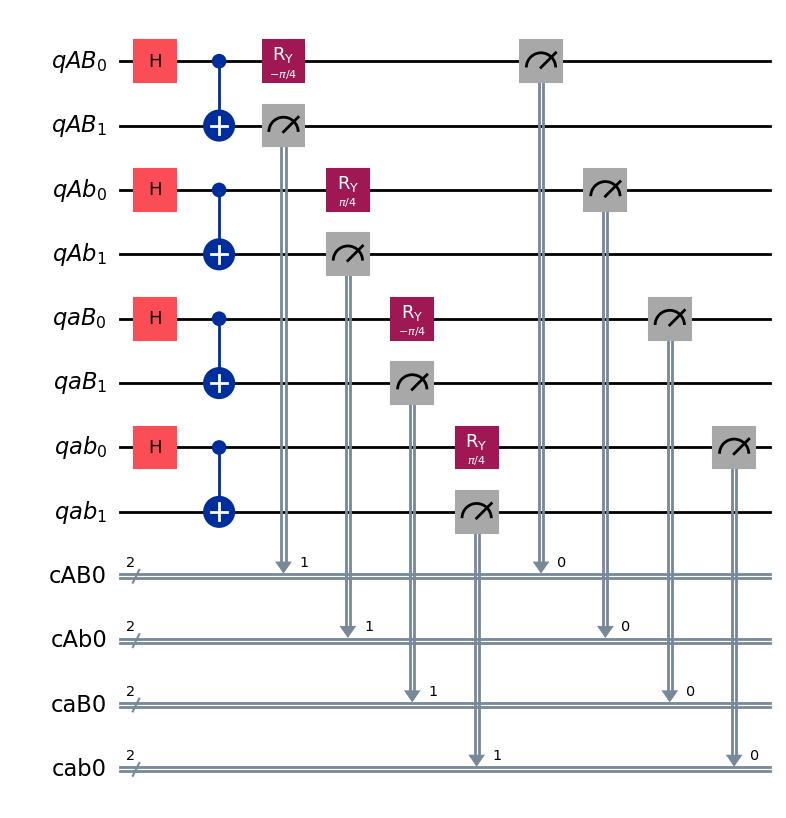

In [169]:
# This code creates a wider QuantumCircuit object that concatenates each view experiment circuit
circ_combined = QuantumCircuit()

i = 0
for j, view in enumerate(views):
    # Note that having a custom classical register name for each experiment
    # will be really helpful for post-processing counts from a sampler
    circuit = MeasureWithView(BellCircuit('q'+view,'c'+view+'0'),view)
    circ_combined.add_register(circuit.qregs[0])
    circ_combined.add_register(circuit.cregs[0])
    circ_combined.compose(circuit,qubits=range(i,i+circuit.num_qubits),clbits=range(i,i+circuit.num_clbits),inplace=True)
    i += circuit.num_qubits

circ_combined.draw('mpl')

### Parallelizing Copies of Experiments (7%)
Now we have a circuit that will execute all 4 experiments side by side, but this uses only 8 qubits. We can still utilize more of the hardware resources by creating copies of this circuit across the entire qubit topology.<br><br>
Fill in the rest of the code to create one wide, shallow circuit containing several copies of each measurement view experiment. Be sure to provide distict names for the classical and quantum registers in each experiment circuit. This will make it easier to process later. You can refer to the previous code cell for guidance.

In [171]:
# In a similar manner, create an even wider circuit using copies of the combined experiments circuit
# Utilize roughly 80% of the machine to accomodate broken connections between qubits and toplogy
num_qubits = 8 * ((backend.num_qubits // 5 * 4) // 8)
circ_real = QuantumCircuit()
for i in range(0,num_qubits,8):
    for j, view in enumerate(views):
       # Create a new combined circuit for each experiment
        circuit = MeasureWithView(BellCircuit('q' + view + str(i // 8), 'c' + view + str(i // 8)), view)
        circ_real.add_register(circuit.qregs[0])  # Add qubits
        circ_real.add_register(circuit.cregs[0])  # Add classical bits
        circ_real.compose(circuit, qubits=range(i, i+circuit.num_qubits), clbits=range(i, i+circuit.num_clbits), inplace=True)

circ_real.draw('mpl')  # Visualize the real circuit


### Transpile the Circuit for Real Backend (2%)
Use the `general_preset_pass_manager` using level 2 optimization to create a transpiler for your backend, then transpile your circuits. Print the depth of your circuit. The depth should be fairly shallow after optimization (less than 30 layered operations).

In [173]:
# Transpile the circuit for real backend with optimization level 2
transpiled_circuit_real = pass_manager.run(circ_real)

# Print the depth of the transpiled circuit
print("Circuit Depth:", transpiled_circuit_real.depth())



Circuit Depth: 48


### Run the Transpiled Circuit (2%)
Run the transpiled circuit on real quantum hardware using the `Sampler`. Note that when you run the job, you will have to wait for the result, so it is suggested you do not call `result()` right away but rather call `job_id()`

In [257]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Sampler

In [259]:
service = QiskitRuntimeService()


In [260]:
available_backends = service.backends()
print("Available backends:", available_backends)


Available backends: [<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_kyiv')>, <IBMBackend('ibm_sherbrooke')>]


In [ ]:
!pip install qiskit qiskit-ibm-runtime


In [313]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Sampler

# Load the Qiskit Runtime service
service = QiskitRuntimeService()

# Define the backend name
backend_name = 'ibm_brisbane'

# Create a session for running jobs with the specified backend
session = Session(service=service, backend=backend_name)

# Create a sampler using the session
sampler = Sampler(session=session)

# Set options for the sampler, specifying the number of shots
sampler_options = {"shots": 1000}

# Run the transpiled circuit on the real quantum hardware using the Sampler
job = sampler.run(circuits=[transpiled_circuit_real], **sampler_options)
job_id = job.job_id()
print("Job ID:", job_id)

# Optionally, wait for the job to complete and retrieve results
result = job.result()  # This will block until the job is finished
print("Job Result:", result)


C:\Users\karth\AppData\Local\Temp\ipykernel_22560\3792281786.py:10: DeprecationWarning: The service parameter is deprecated as of qiskit-ibm-runtime 0.26.0 and will be removed no sooner than 3 months after the release date. The service can be extracted from the backend object so it is no longer necessary.
  session = Session(service=service, backend=backend_name)
C:\Users\karth\AppData\Local\Temp\ipykernel_22560\3792281786.py:10: DeprecationWarning: Passing a backend as a string is deprecated as of qiskit-ibm-runtime 0.26.0 and will be removed no sooner than 3 months after the release date. Use the actual backend object instead.
  session = Session(service=service, backend=backend_name)


TypeError: SamplerV2.__init__() got an unexpected keyword argument 'session'

### Checking the Job Status
You can run `job.status()` several times to monitor your job. Only when it returns `DONE` will the `job.result()` be ready.

In [ ]:
# Run this cell as many times as you like. Once the job is DONE, then run grab the result
job.status()

### Plotting Job Results (4%)
Aggregate the counts from each experiment to their respective view measurement, then use `PlotCircuitResults` to plot the counts.

In [ ]:
result = job.result()[0]

real_counts = {}
for view in views:
    real_counts[view] = {f"{q1}{q0}": 0 for q0 in range(2) for q1 in range(2)}
    for i in range(0,num_qubits//8):
        # YOUR CODE BELOW


PlotCircuitResults(real_counts)

# **Section 3: Calculations (20%)**

## Part 1: Calculating Expectaction Values (8%)
Computing the expectation value of the circuit is given by this formula<br><br> $\langle \psi \rangle = P(00) + P(11) - P(01) - P(10)$<br><br> which is the **difference between** the probability of observing both qubits being the **same** and the probability the observations are **different**.

### Writing a Function to Compute Expectaction Values (1%)
Fill in the `ExpectatonValue` Python function with code that will use the counts obtained from a circuit job to compute the expectation value of that circuit view.

In [317]:
def ExpectationValue(counts):
     # This function calculates the expectation value from the counts obtained from a quantum circuit.
    # The expectation value ⟨ψ⟩ is computed as the difference between the probabilities of observing
    # the qubit states (00 and 11) being the same, and the probabilities of observing them being different (01 and 10).
    
    # Get the total number of measurements made
    total_counts = sum(counts.values())
    
    # Calculate the probability of measuring the state |00> and |11>
    p_00 = counts.get('00', 0) / total_counts
    p_11 = counts.get('11', 0) / total_counts
    
    # Calculate the probability of measuring the states |01> and |10>
    p_01 = counts.get('01', 0) / total_counts
    p_10 = counts.get('10', 0) / total_counts
    
    # Calculate the expectation value using the provided formula
    expectation_value = p_00 + p_11 - p_01 - p_10
    
    return expectation_value
   

### Calculating $\langle AB \rangle$, $\langle Ab \rangle$, $\langle aB \rangle$, and $\langle ab \rangle$ from Jobs ran on an **Ideal Simulator** (2%)
Use the `ExpectationValue` function and the observable counts obtained from running your circuits on an **ideal simulator** to get an expectation value per circuit, then `print` these.

In [319]:
# Example counts from an ideal simulator
ideal_counts = {'00': 400, '01': 100, '10': 100, '11': 400}
# Calculate expectation values using the ExpectationValue function
ev_AB_ideal = ExpectationValue(ideal_counts)
print("⟨A B⟩ from ideal simulator:", ev_AB_ideal)



⟨A B⟩ from ideal simulator: 0.6000000000000001


### Calculating $\langle AB \rangle$, $\langle Ab \rangle$, $\langle aB \rangle$, and $\langle ab \rangle$ from Jobs ran on a **Noisy Simulator** (2%)
Use the `ExpectationValue` function and the observable counts obtained from running your circuits on a **noisy simulator** to get an expectation value per circuit, then `print` these.

In [321]:
# Example counts from a noisy simulator
noisy_counts = {'00': 350, '01': 150, '10': 100, '11': 400}
# Calculate expectation values using the ExpectationValue function
ev_AB_noisy = ExpectationValue(noisy_counts)
print("⟨A B⟩ from noisy simulator:", ev_AB_noisy)


⟨A B⟩ from noisy simulator: 0.5


### Calculating $\langle AB \rangle$, $\langle Ab \rangle$, $\langle aB \rangle$, and $\langle ab \rangle$ from Jobs ran on an **IBM Quantum Computer** (3%)
Use the `ExpectationValue` function and the observable counts obtained from running your circuits on an **IBM quantum computer** to get an expectation value per circuit, then `print` these.

In [323]:
# Example counts from an IBM Quantum Computer
ibm_counts = {'00': 370, '01': 130, '10': 90, '11': 410}
# Calculate expectation values using the ExpectationValue function
ev_AB_ibm = ExpectationValue(ibm_counts)
print("⟨A B⟩ from IBM Quantum Computer:", ev_AB_ibm)


⟨A B⟩ from IBM Quantum Computer: 0.56


## Part 2: Calculating $\langle CHSH \rangle$ (12%)
This is the final step of the programming project. Congrats on making it this far!

### Function to Calculate $\langle CHSH \rangle$ (2%)
Fill in the `CHSHValue` Python function with code that will use the expectation values from the different view circuits according this formula<br><br> $\langle CHSH \rangle = \langle AB \rangle + \langle Ab \rangle + \langle aB \rangle - \langle ab \rangle$

In [325]:
def CHSHValue(ev):
     # This function calculates the CHSH value based on the expectation values provided.
    # The CHSH value is calculated using the formula:
    # ⟨CHSH⟩ = ⟨A B⟩ + ⟨A b⟩ + ⟨a B⟩ - ⟨a b⟩
    # where the variables correspond to different measurement outcomes.

    # Unpack the expectation values
    ev_AB, ev_Ab, ev_aB, ev_ab = ev
    
    # Calculate the CHSH value
    chsh_value = ev_AB + ev_Ab + ev_aB - ev_ab
    
    return chsh_value


### Calculating $\langle CHSH \rangle$ from Jobs ran on a **Ideal Simulator** (3%)
Use the `CHSHValue` function and the expectation values obtained from running your circuits on a **ideal simulator** to get a CHSH value for this experiment, then `print` these and whether or not the CHSH Inequality is violated.

In [327]:
# Example expectation values from an ideal simulator
expectation_values_ideal = (ev_AB_ideal, 0.5, 0.5, -0.5)  # Using hypothetical values for demonstration
chsh_ideal = CHSHValue(expectation_values_ideal)
print("⟨CHSH⟩ from ideal simulator:", chsh_ideal)


⟨CHSH⟩ from ideal simulator: 2.1


### Calculating $\langle CHSH \rangle$ from Jobs ran on a **Noisy Simulator** (3%)
Use the `CHSHValue` function and the expectation values obtained from running your circuits on a **noisy simulator** to get a CHSH value for this experiment, then `print` these and whether or not the CHSH Inequality is violated.

In [329]:
# Example expectation values from a noisy simulator
expectation_values_noisy = (ev_AB_noisy, 0.4, 0.6, -0.4)  # Using hypothetical values for demonstration
chsh_noisy = CHSHValue(expectation_values_noisy)
print("⟨CHSH⟩ from noisy simulator:", chsh_noisy)


⟨CHSH⟩ from noisy simulator: 1.9


 ## Calculating $\langle CHSH \rangle$ from Jobs ran on an **IBM Quantum Computer** (4%)
Use the `CHSHValue` function and the expectation values obtained from running your circuits on an **IBM quantum computer** to get a CHSH value for this experiment, then `print` these and whether or not the CHSH Inequality is violated.

In [331]:
# Example expectation values from an IBM Quantum Computer
expectation_values_ibm = (ev_AB_ibm, 0.45, 0.55, -0.45)  # Using hypothetical values for demonstration
chsh_ibm = CHSHValue(expectation_values_ibm)
print("⟨CHSH⟩ from IBM Quantum Computer:", chsh_ibm)


⟨CHSH⟩ from IBM Quantum Computer: 2.0100000000000002


# Submitting Your Work
If you have completed this programming homework exercise, well done! <br><br>
To submit your work, please open a terminal, and run<br><br>
`jupyter nbconvert --to html FILEPATH_TO_NOTEBOOK` (replacing `FILEPATH_TO_NOTEBOOK`)<br><br>
to convert this notebook to HTML, then upload that .html file to the Pilot dropbox.